In [1]:
'''Trains a simple convnet on the Zalando MNIST dataset.
Gets to 81.03% test accuracy after 30 epochs
(there is still a lot of margin for parameter tuning).
3 seconds per epoch on a GeForce GTX 980 GPU with CuDNN 5.
'''

from __future__ import print_function
import numpy as np
import mnist_reader as mr
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
x_train, y_train = mr.load_mnist('data/fashion', kind='train')
x_test, y_test = mr.load_mnist('data/fashion', kind='t10k')

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

no_dropout_record = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 164s 3ms/step - loss: 1.0631 - acc: 0.6382 - val_loss: 0.6920 - val_acc: 0.7308
Epoch 2/12
48000/48000 [==============================] - 163s 3ms/step - loss: 0.6557 - acc: 0.7618 - val_loss: 0.5695 - val_acc: 0.7958
Epoch 3/12
48000/48000 [==============================] - 147s 3ms/step - loss: 0.5867 - acc: 0.7856 - val_loss: 0.6206 - val_acc: 0.7807
Epoch 4/12
48000/48000 [==============================] - 149s 3ms/step - loss: 0.5419 - acc: 0.8020 - val_loss: 0.5184 - val_acc: 0.8145
Epoch 5/12
48000/48000 [==============================] - 146s 3ms/step - loss: 0.5134 - acc: 0.8113 - val_loss: 0.4884 - val_acc: 0.8255
Epoch 6/12
48000/48000 [==============================] - 140s 3ms/step - loss: 0.4897 - acc: 0.8216 - val_loss: 0.6150 - val_acc: 0.7570
Epoch 7/12
48000/48000 [=========================

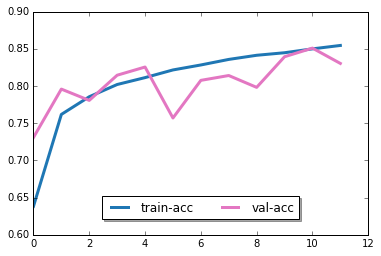

In [2]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_acc = no_dropout_record.history['acc']
val_acc = no_dropout_record.history['val_acc']

ax = plt.subplot(111)
plt.plot(iter_log, train_acc, label='train-acc', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_acc, label='val-acc', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),  shadow=True, ncol=2)
plt.show()

In [3]:
'''Trains a simple convnet on the Zalando MNIST dataset.
Gets to 81.03% test accuracy after 30 epochs
(there is still a lot of margin for parameter tuning).
3 seconds per epoch on a GeForce GTX 980 GPU with CuDNN 5.
'''

from __future__ import print_function
import numpy as np
import mnist_reader as mr
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

dropout_record = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 200s 4ms/step - loss: 1.3586 - acc: 0.5154 - val_loss: 0.7333 - val_acc: 0.7352
Epoch 2/12
48000/48000 [==============================] - 195s 4ms/step - loss: 0.8437 - acc: 0.6890 - val_loss: 0.6234 - val_acc: 0.7610
Epoch 3/12
48000/48000 [==============================] - 179s 4ms/step - loss: 0.7350 - acc: 0.7302 - val_loss: 0.5806 - val_acc: 0.7762
Epoch 4/12
48000/48000 [==============================] - 189s 4ms/step - loss: 0.6786 - acc: 0.7463 - val_loss: 0.5435 - val_acc: 0.7925
Epoch 5/12
48000/48000 [==============================] - 152s 3ms/step - loss: 0.6386 - acc: 0.7616 - val_loss: 0.5159 - val_acc: 0.8058
Epoch 6/12
48000/48000 [==============================] - 174s 4ms/step - loss: 0.6076 - acc: 0.7717 - val_loss: 0.4943 - val_acc: 0.8223
Epoch 7/12
48000/48000 [==============================] - 184s 4ms/step - loss: 0.5827 - acc: 0.7848 - val_loss: 0.4812 - 

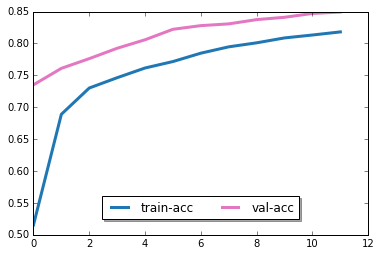

In [4]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_acc = dropout_record.history['acc']
val_acc = dropout_record.history['val_acc']

ax = plt.subplot(111)
plt.plot(iter_log, train_acc, label='train-acc', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_acc, label='val-acc', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),  shadow=True, ncol=2)
plt.show()

**Dropout :**
> 1. 在訓練過程中，Dropout Layer會丟棄一定數量的message，只讓部分發揮作用。而且，由於採用隨機丟棄的方式，每一次進行前向後向計算時，丟棄掉的數據都會有所不同。這樣，模型每一次的前向後向計算的表現都會不同 <br\>
> 2. 沒有dropout的acc會有overfitting的現象，且準確率浮動很大